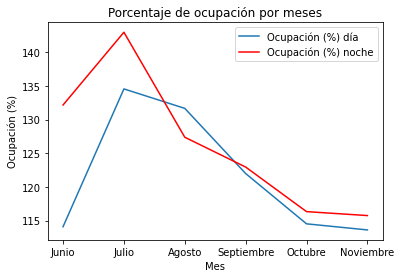

In [2]:
# %matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = 'dataset_hospital2.xlsx'
df = pd.read_excel(file_name, sheet_name = 1)
#hospital = df[['Servicio', 'Pacientes', 'No. Médicos generales', 'No. Enfermer@s', 'Cupo', 'Ocupación (%)']]

def get_average_by_month(dataframe, month, column, time):
    month_raw = (dataframe['mes'] == month) & (dataframe['Espacio de tiempo'] == time)
    
    month = dataframe[month_raw]
    month.dropna(subset = [column], inplace = True)
    return np.average(month[column].astype(int))

avg_june = get_average_by_month(df, 'Junio', 'Ocupación (%)', 'Día')
avg_july = get_average_by_month(df, 'Julio', 'Ocupación (%)', 'Día')
avg_august = get_average_by_month(df, 'Agosto', 'Ocupación (%)', 'Día')
avg_september = get_average_by_month(df, 'Septiembre', 'Ocupación (%)', 'Día')
avg_october = get_average_by_month(df, 'Octubre', 'Ocupación (%)', 'Día')
avg_november = get_average_by_month(df, 'Noviembre', 'Ocupación (%)', 'Día')

avg_june_night = get_average_by_month(df, 'Junio', 'Ocupación (%)', 'Noche')
avg_july_night = get_average_by_month(df, 'Julio', 'Ocupación (%)', 'Noche')
avg_august_night = get_average_by_month(df, 'Agosto', 'Ocupación (%)', 'Noche')
avg_september_night = get_average_by_month(df, 'Septiembre', 'Ocupación (%)', 'Noche')
avg_october_night = get_average_by_month(df, 'Octubre', 'Ocupación (%)', 'Noche')
avg_november_night = get_average_by_month(df, 'Noviembre', 'Ocupación (%)', 'Noche')

months = ['Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre']

day = [avg_june, avg_july, avg_august, avg_september, avg_october, avg_november]
night = [avg_june_night, avg_july_night, avg_august_night, avg_september_night, avg_october_night, avg_november_night]

new_df = pd.DataFrame({
    'Mes': months,
    'Ocupación (%) día': day,
    'Ocupación (%) noche': night
})

#fig = plt.subplots()
ax = plt.gca()
# ax.plot(months, day, label = 'Día')
# ax.plot(months, night, label = 'Noche')
new_df.plot(kind = 'line', x = 'Mes', y = 'Ocupación (%) día', ax=ax)
new_df.plot(kind = 'line', x = 'Mes', y = 'Ocupación (%) noche', color = 'red', ax=ax)

ax.set(xlabel='Mes', ylabel='Ocupación (%)',
       title='Porcentaje de ocupación por meses')
#ax.grid()

# fig.savefig("test.png")
plt.legend()
plt.show()